In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import math
import seaborn as sn
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler

In [543]:
import warnings
warnings.filterwarnings('ignore')

In [675]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

In [545]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [546]:
# Separate features and labels
X_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = test.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_test = test[['label_1', 'label_2', 'label_3', 'label_4']]

In [547]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [548]:
knn = KNeighborsClassifier(n_neighbors=1)
def knn_classifier(X_train, Y_train, X_val, Y_val):
    knn.fit(np.array(X_train), Y_train)

    y_pred = knn.predict(np.array(X_val))

    accuracy = accuracy_score(Y_val, y_pred)
    return accuracy

### Label_1

<Axes: xlabel='label_1', ylabel='count'>

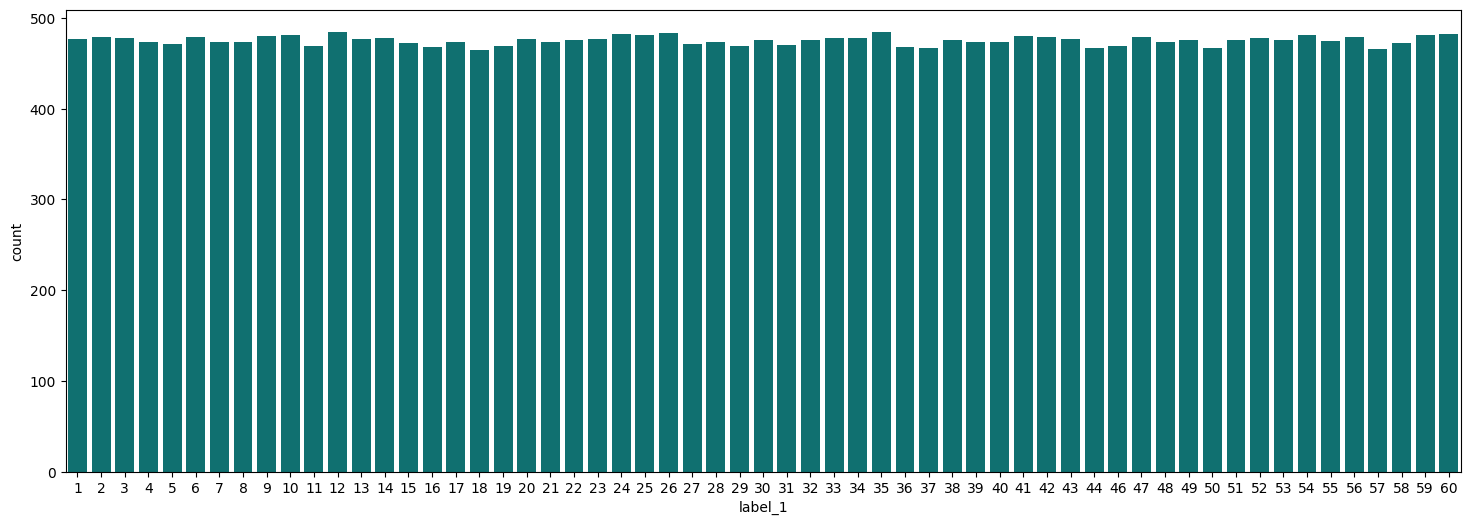

In [655]:
plt.figure(figsize=(18, 6))
sn.countplot(data=y_train, x='label_1', color='teal')

In [549]:
accuracy = knn_classifier(X_train, y_train['label_1'], X_val, y_val['label_1'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.93%


In [550]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        

In [551]:
def correlation_with_label(dataset, label, thereshold = 0.01):

    corr_matrix = dataset.corr()
    label_col_id = corr_matrix.columns.get_loc(label)

    corr_with_label = corr_matrix.iloc[:, label_col_id]

    corr_fearures = corr_with_label[corr_with_label.index != label]
    corr_fearures = corr_fearures[corr_fearures.abs() < thereshold]

    return corr_fearures.index.tolist()

In [552]:
train.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
feature_1,1.000000,-0.122368,-0.043844,0.133359,0.085920,0.143903,0.028939,-0.141357,0.049066,0.180607,...,0.080079,-0.293291,-0.130838,0.213589,-0.029109,-0.046556,0.196835,-0.054773,0.012352,-0.027306
feature_2,-0.122368,1.000000,-0.315640,-0.038636,-0.066823,0.014991,0.001485,-0.069789,-0.177971,-0.229639,...,-0.097919,0.145376,0.227251,0.142215,0.186345,-0.146253,-0.070909,-0.083949,-0.038166,-0.112111
feature_3,-0.043844,-0.315640,1.000000,0.019540,-0.024949,-0.042450,0.107391,-0.004427,0.133795,0.043577,...,0.039028,-0.032455,-0.095846,-0.044789,-0.191170,0.045783,-0.092739,0.122517,0.305422,0.103653
feature_4,0.133359,-0.038636,0.019540,1.000000,0.164739,0.342170,-0.033977,-0.120289,0.162836,-0.096058,...,0.239254,-0.263488,0.018143,0.339311,-0.043473,-0.310500,0.009204,-0.005010,-0.117647,0.080519
feature_5,0.085920,-0.066823,-0.024949,0.164739,1.000000,0.165496,-0.277043,-0.086430,0.098080,0.094618,...,0.124504,0.046793,0.000250,0.366209,0.250435,0.078442,0.068396,0.068817,0.068270,0.025991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_256,-0.046556,-0.146253,0.045783,-0.310500,0.078442,0.137188,-0.264550,-0.258903,0.212040,-0.238555,...,-0.355017,0.401299,-0.146592,-0.262347,0.179979,1.000000,0.019870,0.021947,0.361959,0.080645
label_1,0.196835,-0.070909,-0.092739,0.009204,0.068396,-0.089151,0.026829,-0.058984,0.119387,0.120220,...,0.036830,-0.068237,0.016891,0.163097,0.216063,0.019870,1.000000,-0.038758,-0.403477,-0.021115
label_2,-0.054773,-0.083949,0.122517,-0.005010,0.068817,0.089700,-0.092337,-0.090452,0.093125,0.010411,...,-0.008342,0.025528,-0.079649,0.028317,0.015842,0.021947,-0.038758,1.000000,0.086053,0.242613
label_3,0.012352,-0.038166,0.305422,-0.117647,0.068270,0.237470,-0.085678,-0.052134,0.040492,-0.092567,...,-0.084131,0.151066,-0.026967,-0.012616,-0.129308,0.361959,-0.403477,0.086053,1.000000,0.016825


In [553]:
corr_features = correlation_with_label(train, 'label_1', 0.01)
len(set(corr_features))

14

In [554]:
X_train_filtered = X_train.drop(columns=list(corr_features))
X_val_filtered = X_val.drop(columns=list(corr_features))
X_test_filtered = X_test.drop(columns=list(corr_features))

In [555]:
corr_features = correlation(X_train_filtered, 0.5)
len(set(corr_features))

53

In [556]:
X_train_filtered = X_train_filtered.drop(columns=list(corr_features))
X_val_filtered = X_val_filtered.drop(columns=list(corr_features))
X_test_filtered = X_test_filtered.drop(columns=list(corr_features))

In [557]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [558]:
accuracy = knn_classifier(X_train_scaled, y_train['label_1'], X_val_scaled, y_val['label_1'] )
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 98.53%


In [571]:
pca = PCA(n_components=0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [572]:
X_train_pca.shape

(28520, 64)

In [574]:
min_shape = 256
while True:
    pca = PCA(n_components=0.95, svd_solver='full')
    min_shape = X_train_pca.shape[1]
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)
    X_test_pca = pca.transform(X_test_pca)
    accuracy_val = knn_classifier(X_train_pca, y_train['label_1'], X_val_pca, y_val['label_1'] )
    y_pred_test = knn.predict(np.array(X_test_pca))
    accuracy_test = accuracy_score(y_test['label_1'], y_pred_test)
    if accuracy_test < 0.98 or accuracy_val < 0.975:
        break
 
print (min_shape)

48


In [575]:
pca = PCA(n_components=48, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [576]:
X_train_pca.shape

(28520, 48)

In [577]:
accuracy = knn_classifier(X_train_pca, y_train['label_1'], X_val_pca, y_val['label_1'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.87%


In [578]:
y_pred_test = knn.predict(np.array(X_test_pca))

accuracy = accuracy_score(y_test['label_1'], y_pred_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.13%


In [579]:
label1_features = pca.get_feature_names_out()
label1_features

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35',
       'pca36', 'pca37', 'pca38', 'pca39', 'pca40', 'pca41', 'pca42',
       'pca43', 'pca44', 'pca45', 'pca46', 'pca47'], dtype=object)

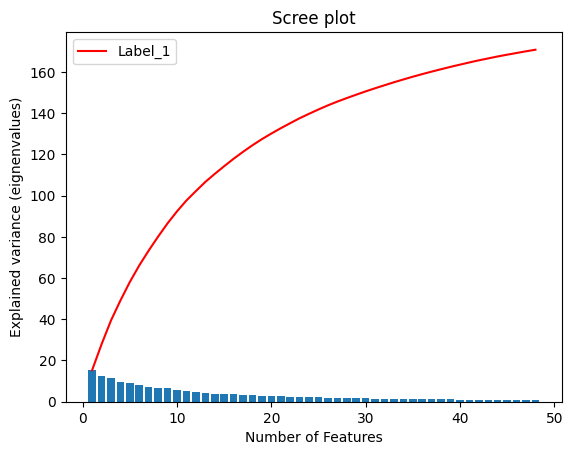

In [580]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Label_1')
 
plt.legend(loc='upper left')
plt.xlabel('Number of Features')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

### Label_2

In [581]:
label2_train = train.copy()
label2_valid = valid.copy()
label2_test = test.copy()

In [582]:
label2_train = label2_train.dropna(subset=['label_2'])
label2_valid = label2_valid.dropna(subset=['label_2'])
label2_test = label2_test.dropna(subset=['label_2'])

In [583]:
label2_train['label_2'].head()

480    25.0
481    25.0
482    25.0
483    25.0
484    25.0
Name: label_2, dtype: float64

In [584]:
X_train = label2_train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = label2_train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = label2_valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = label2_valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = label2_test.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_test = label2_test[['label_1', 'label_2', 'label_3', 'label_4']]

<Axes: xlabel='label_2', ylabel='Count'>

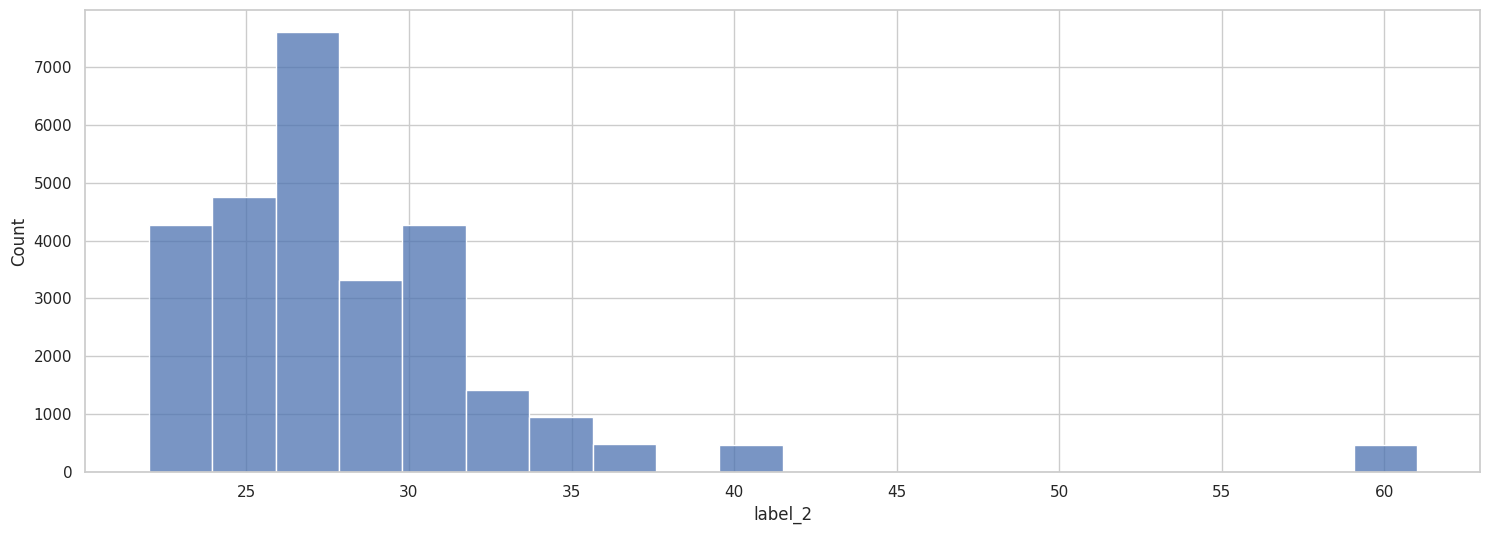

In [687]:
plt.figure(figsize=(18, 6))
sn.histplot(data=y_train, x='label_2', bins=20, kde=False)

In [585]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train['label_2'])
y_pred = model.predict(X_val)
testScore = math.sqrt(mean_squared_error(y_val['label_2'], y_pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 3.29 RMSE


In [586]:
corr_features = correlation_with_label(label2_train, 'label_2')
len(set(corr_features))

25

In [588]:
X_train_filtered = X_train.drop(columns=list(corr_features))
X_val_filtered = X_val.drop(columns=list(corr_features))
X_test_filtered = X_test.drop(columns=list(corr_features))

In [589]:
corr_features = correlation(X_train_filtered, 0.5)
len(set(corr_features))

53

In [590]:
X_train_filtered = X_train_filtered.drop(columns=list(corr_features))
X_val_filtered = X_val_filtered.drop(columns=list(corr_features))
X_test_filtered = X_test_filtered.drop(columns=list(corr_features))

In [591]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [592]:
pca = PCA(n_components=0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [593]:
min_shape = 256
while True:
    pca = PCA(n_components=0.95, svd_solver='full')
    min_shape = X_train_pca.shape[1]
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)
    X_test_pca = pca.transform(X_test_pca)
    model = xgb.XGBRegressor()
    model.fit(X_train_pca, y_train['label_2'])
    y_pred = model.predict(X_val_pca)
    testScore_val = math.sqrt(mean_squared_error(y_val['label_2'], y_pred))
    y_pred_test = model.predict(X_test_pca)
    testScore_test = math.sqrt(mean_squared_error(y_test['label_2'], y_pred_test))
    if testScore_val > 3.8 or testScore_test > 3.6:
        break
 
print (min_shape)   
    

25


In [594]:
pca = PCA(n_components=25, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [595]:
model = xgb.XGBRegressor()
model.fit(X_train_pca, y_train['label_2'])
y_pred = model.predict(X_val_pca)
testScore = math.sqrt(mean_squared_error(y_val['label_2'], y_pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 3.77 RMSE


In [596]:
y_pred_test = model.predict(X_test_pca)
testScore = math.sqrt(mean_squared_error(y_test['label_2'], y_pred_test))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 3.32 RMSE


In [597]:
label2_features = pca.get_feature_names_out()
label2_features

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24'], dtype=object)

### Label_3

In [656]:
# Separate features and labels
X_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = test.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_test = test[['label_1', 'label_2', 'label_3', 'label_4']]

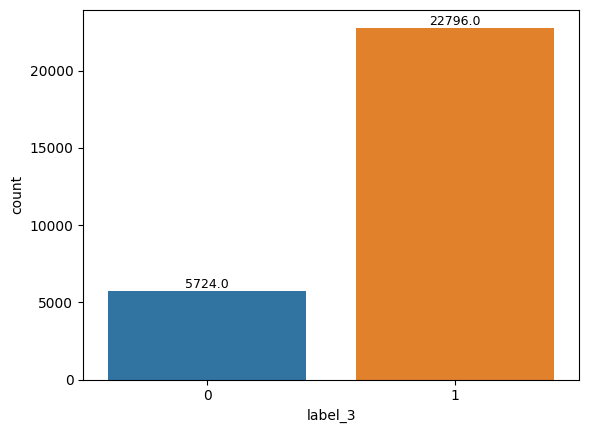

In [657]:
ax = sn.countplot(x=y_train['label_3'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')


In [755]:
ros = RandomOverSampler(random_state=0, sampling_strategy=0.75)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train['label_3'])

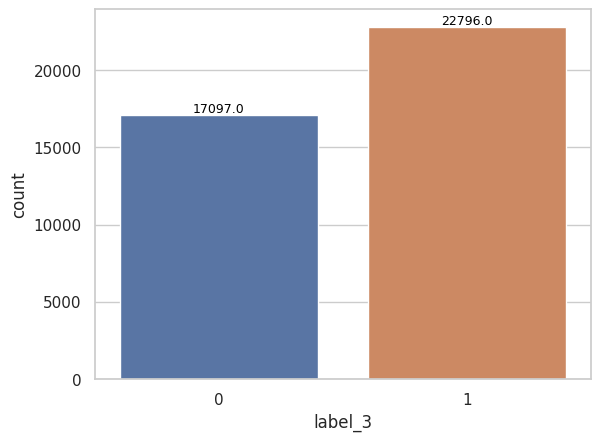

In [756]:
ax = sn.countplot(x=y_train_resampled)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')


In [757]:
accuracy = knn_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_3'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [758]:
corr_features = correlation_with_label(train, 'label_3', 0.01)
len(set(corr_features))

4

In [759]:
X_train_filtered = X_train_resampled.drop(columns=list(corr_features))
X_val_filtered = X_val.drop(columns=list(corr_features))
X_test_filtered = X_test.drop(columns=list(corr_features))

In [760]:
corr_features = correlation(X_train_filtered, 0.5)
len(set(corr_features))

60

In [761]:
X_train_filtered = X_train_filtered.drop(columns=list(corr_features))
X_val_filtered = X_val_filtered.drop(columns=list(corr_features))
X_test_filtered = X_test_filtered.drop(columns=list(corr_features))

In [762]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [773]:
accuracy = knn_classifier(X_train_scaled, y_train_resampled, X_val_scaled, y_val['label_3'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [774]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [775]:
X_train_pca.shape[1]

64

In [776]:
min_shape = 256
while True:
    pca = PCA(n_components=0.95, svd_solver='full')
    min_shape = X_train_pca.shape[1]
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)
    X_test_pca = pca.transform(X_test_pca)
    accuracy_val = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_3'] )
    y_pred_test = knn.predict(np.array(X_test_pca))
    accuracy_test = accuracy_score(y_test['label_3'], y_pred_test)
    if accuracy_val < 1 or accuracy_test < 1:
        break
 
print (min_shape)
    

64


In [794]:
pca = PCA(n_components=35, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [795]:
accuracy = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_3'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [796]:
y_pred_test = knn.predict(np.array(X_test_pca))

accuracy = accuracy_score(y_test['label_3'], y_pred_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [797]:
label3_features = pca.get_feature_names_out()
label3_features

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34'], dtype=object)

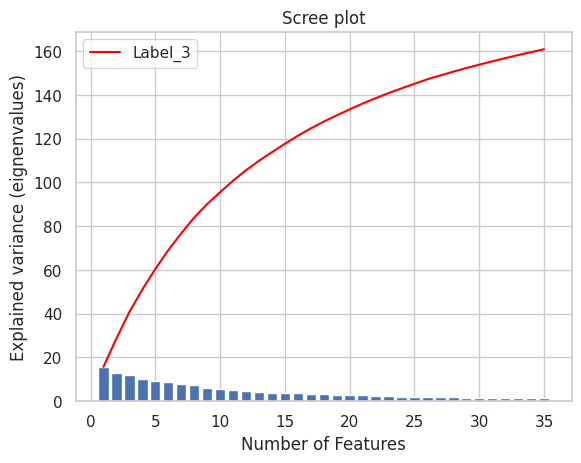

In [798]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Label_3')
 
plt.legend(loc='upper left')
plt.xlabel('Number of Features')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

### Label_4

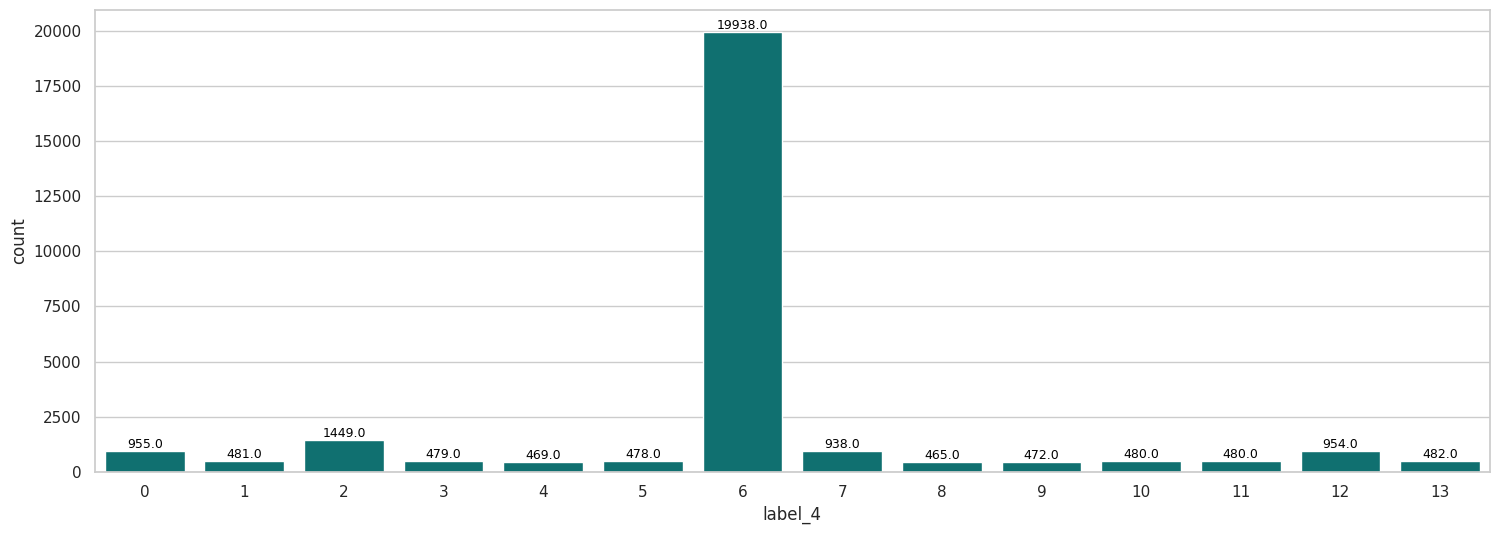

In [809]:
plt.figure(figsize=(18, 6))
ax = sn.countplot(x=y_train['label_4'], color='teal')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

In [810]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train['label_4'])

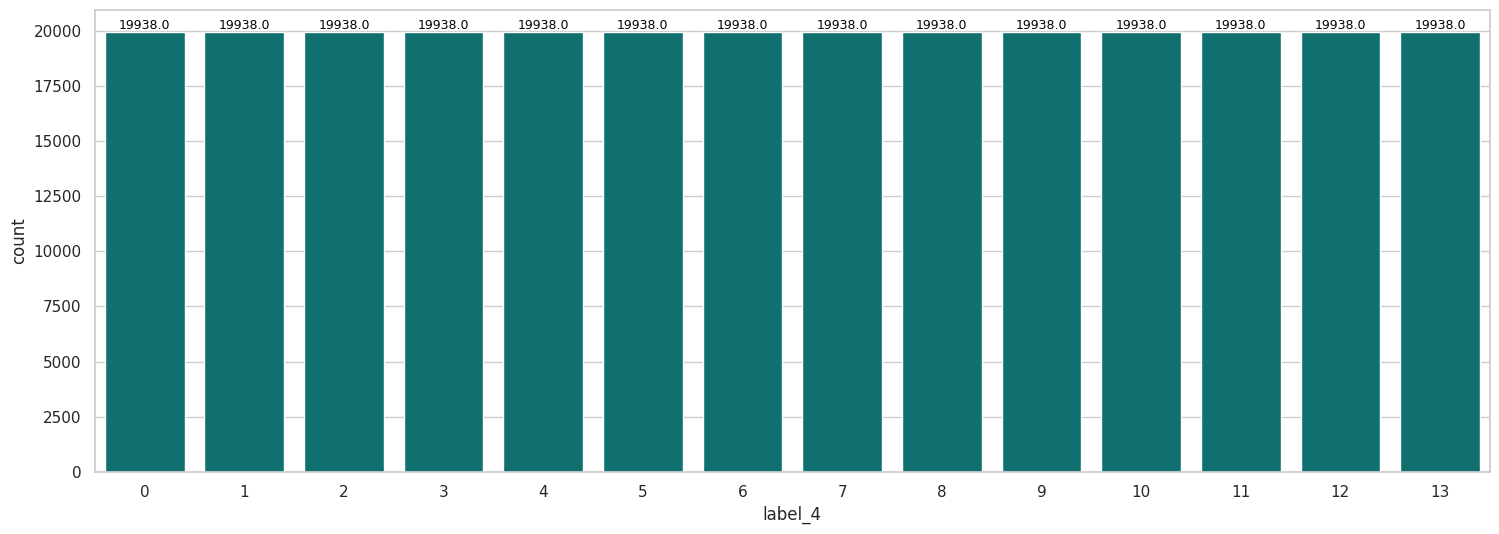

In [811]:
plt.figure(figsize=(18, 6))
ax = sn.countplot(x=y_train_resampled, color='teal')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

In [816]:
accuracy = knn_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_4'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.60%


In [822]:
corr_features = correlation_with_label(train, 'label_4', 0.01)
len(set(corr_features))

25

In [823]:
X_train_filtered = X_train_resampled.drop(columns=list(corr_features))
X_val_filtered = X_val.drop(columns=list(corr_features))
X_test_filtered = X_test.drop(columns=list(corr_features))

In [824]:
corr_features = correlation(X_train_filtered, 0.5)
len(set(corr_features))

65

In [825]:
X_train_filtered = X_train_filtered.drop(columns=list(corr_features))
X_val_filtered = X_val_filtered.drop(columns=list(corr_features))
X_test_filtered = X_test_filtered.drop(columns=list(corr_features))

In [826]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [828]:
accuracy = knn_classifier(X_train_scaled, y_train_resampled, X_val_scaled, y_val['label_4'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.33%


In [829]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [830]:
X_train_pca.shape[1]

61

In [831]:
min_shape = 256
while True:
    pca = PCA(n_components=0.95, svd_solver='full')
    min_shape = X_train_pca.shape[1]
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)
    X_test_pca = pca.transform(X_test_pca)
    accuracy_val = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_3'] )
    y_pred_test = knn.predict(np.array(X_test_pca))
    accuracy_test = accuracy_score(y_test['label_4'], y_pred_test)
    if accuracy_val < 0.985 or accuracy_test < 0.985:
        break
 
print (min_shape)


61


In [847]:
pca = PCA(n_components=34, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [848]:
accuracy = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_4'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.67%


In [849]:
y_pred_test = knn.predict(np.array(X_test_pca))

accuracy = accuracy_score(y_test['label_4'], y_pred_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.07%


In [850]:
label4_features = pca.get_feature_names_out()
label4_features

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'pca31', 'pca32', 'pca33'], dtype=object)

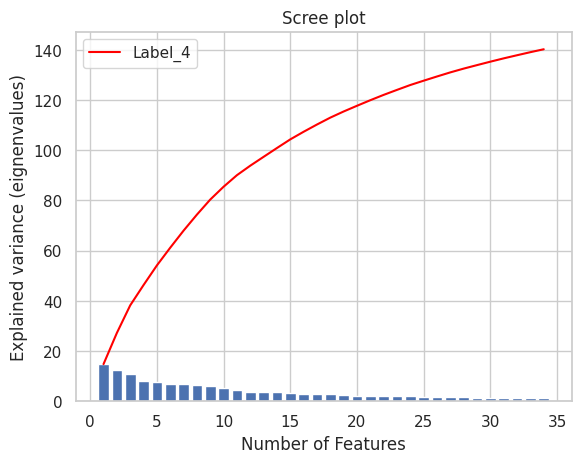

In [851]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Label_4')
 
plt.legend(loc='upper left')
plt.xlabel('Number of Features')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

### Summary

In [853]:
print (f"Features to determine Speaker ID (Label_1): {len(set(label1_features))}")
print (f"Features to determine Speaker Age (Label_2): {len(set(label2_features))}")
print (f"Features to determine Speaker Gender (Label_3): {len(set(label3_features))}")
print (f"Features to determine Speaker Accent (Label_4): {len(set(label4_features))}")

Features to determine Speaker ID (Label_1): 48
Features to determine Speaker Age (Label_2): 25
Features to determine Speaker Gender (Label_3): 35
Features to determine Speaker Accent (Label_4): 34
